In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def parse(x):
    x = x.split()
    x[0] = float(x[0])
    if(x[-1] == "ms"):
        x[0] *= 1000
    return float(x[0])

In [10]:
data = pd.read_csv("data.csv")
#bandwidth = data.pivot(index="Link delay", columns='Window size', values='Bandwidth').fillna(0)

# ms -> us
data[["Mean time","Mean min","Mean max"]] = data[["Mean time","Mean min","Mean max"]].applymap(parse)

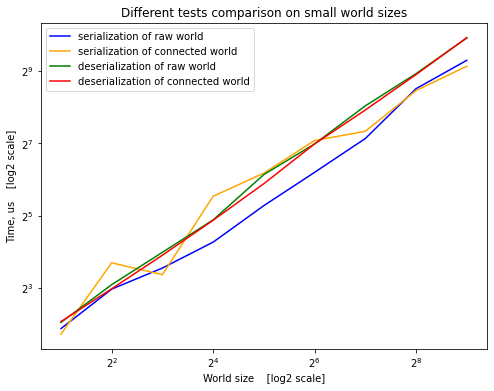

In [19]:
sr_data = data[data["Test type"] == "SR"][:9]
sc_data = data[data["Test type"] == "SC"][:9]
dr_data = data[data["Test type"] == "DR"][:9]
dc_data = data[data["Test type"] == "DC"][:9]
x = data[data["Test type"] == "SR"]["World size"][:9]

_, ax = plt.subplots(1, figsize=(8,6))
ax.loglog(x,sr_data["Mean time"], color='blue', label='serialization of raw world', base=2)
ax.loglog(x,sc_data["Mean time"], color='orange', label='serialization of connected world', base=2)
ax.loglog(x,dr_data["Mean time"], color='green', label='deserialization of raw world', base=2)
ax.loglog(x,dc_data["Mean time"], color='red', label='deserialization of connected world', base=2)
ax.legend()
plt.title("Different tests comparison on small world sizes")
plt.ylabel("Time, us    [log2 scale]")
plt.xlabel("World size    [log2 scale]")
plt.savefig("time_all_small_loglog.png")

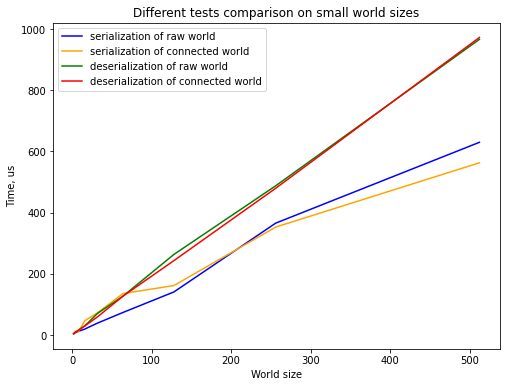

In [20]:
sr_data = data[data["Test type"] == "SR"][:9]
sc_data = data[data["Test type"] == "SC"][:9]
dr_data = data[data["Test type"] == "DR"][:9]
dc_data = data[data["Test type"] == "DC"][:9]
x = data[data["Test type"] == "SR"]["World size"][:9]

_, ax = plt.subplots(1, figsize=(8,6))
ax.plot(x,sr_data["Mean time"], color='blue', label='serialization of raw world')
ax.plot(x,sc_data["Mean time"], color='orange', label='serialization of connected world')
ax.plot(x,dr_data["Mean time"], color='green', label='deserialization of raw world')
ax.plot(x,dc_data["Mean time"], color='red', label='deserialization of connected world')
ax.legend()
plt.title("Different tests comparison on small world sizes")
plt.ylabel("Time, us")
plt.xlabel("World size")
plt.savefig("time_all_small_plot.png")

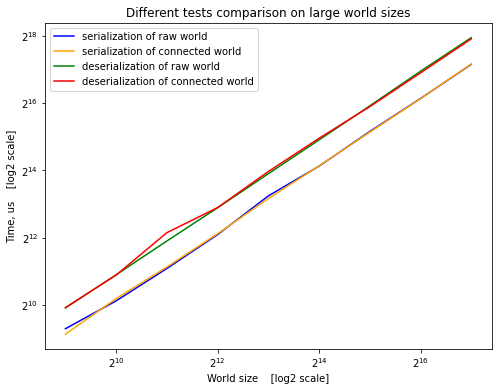

In [21]:
sr_data = data[data["Test type"] == "SR"][-9:]
sc_data = data[data["Test type"] == "SC"][-9:]
dr_data = data[data["Test type"] == "DR"][-9:]
dc_data = data[data["Test type"] == "DC"][-9:]
x = data[data["Test type"] == "SR"]["World size"][-9:]

_, ax = plt.subplots(1, figsize=(8,6))
ax.loglog(x,sr_data["Mean time"], color='blue', label='serialization of raw world', base=2)
ax.loglog(x,sc_data["Mean time"], color='orange', label='serialization of connected world', base=2)
ax.loglog(x,dr_data["Mean time"], color='green', label='deserialization of raw world', base=2) 
ax.loglog(x,dc_data["Mean time"], color='red', label='deserialization of connected world', base=2) 
ax.legend()
plt.title("Different tests comparison on large world sizes")
plt.ylabel("Time, us    [log2 scale]")
plt.xlabel("World size    [log2 scale]")
plt.savefig("time_all_big_loglog.png")

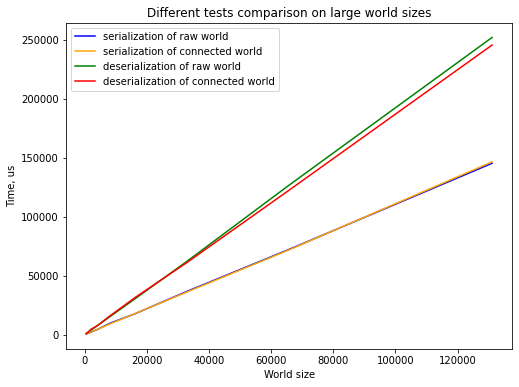

In [22]:
sr_data = data[data["Test type"] == "SR"][-9:]
sc_data = data[data["Test type"] == "SC"][-9:]
dr_data = data[data["Test type"] == "DR"][-9:]
dc_data = data[data["Test type"] == "DC"][-9:]
x = data[data["Test type"] == "SR"]["World size"][-9:]

_, ax = plt.subplots(1, figsize=(8,6))
ax.plot(x,sr_data["Mean time"], color='blue', label='serialization of raw world')
ax.plot(x,sc_data["Mean time"], color='orange', label='serialization of connected world')
ax.plot(x,dr_data["Mean time"], color='green', label='deserialization of raw world') 
ax.plot(x,dc_data["Mean time"], color='red', label='deserialization of connected world') 
ax.legend()
plt.title("Different tests comparison on large world sizes")
plt.ylabel("Time, us")
plt.xlabel("World size")
plt.savefig("time_all_big_plot.png")

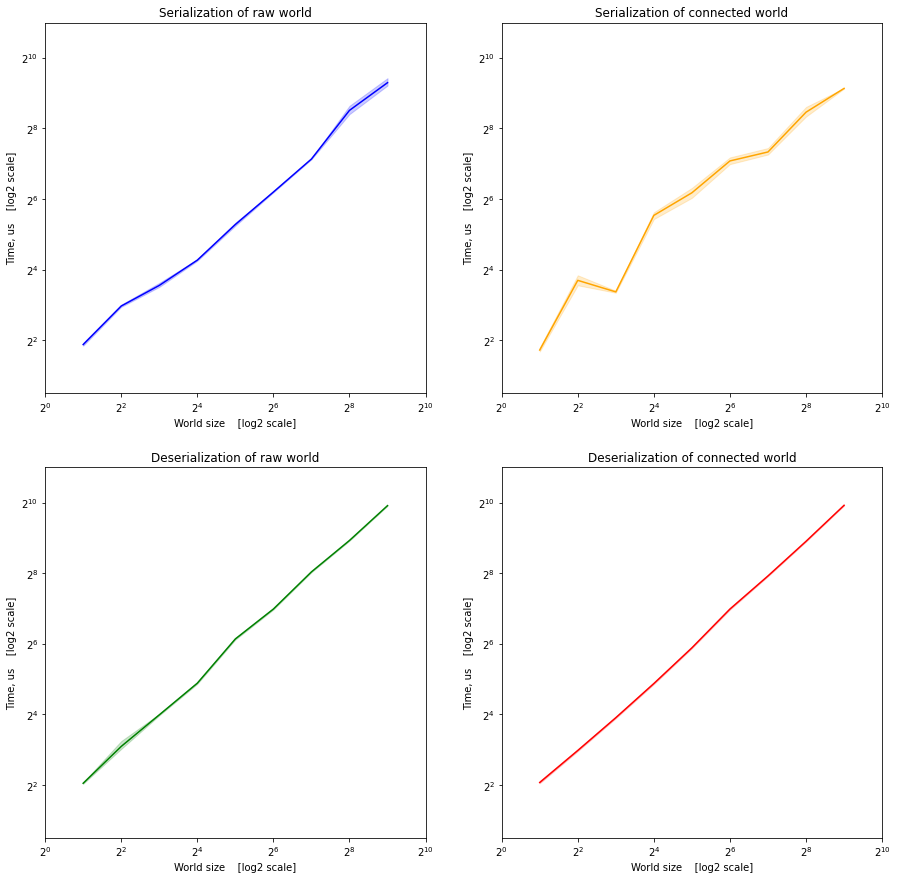

In [35]:
sr_data = data[data["Test type"] == "SR"][:9]
sc_data = data[data["Test type"] == "SC"][:9]
dr_data = data[data["Test type"] == "DR"][:9]
dc_data = data[data["Test type"] == "DC"][:9]
x = data[data["Test type"] == "SR"]["World size"][:9]

_, ax = plt.subplots(2,2, figsize=(15,15))
ax[0][0].loglog(x,sr_data["Mean time"], color='blue', label='serialization of raw world', base=2)
ax[0][1].loglog(x,sc_data["Mean time"], color='orange', label='serialization of connected world', base=2)
ax[1][0].loglog(x,dr_data["Mean time"], color='green', label='deserialization of raw world', base=2)
ax[1][1].loglog(x,dc_data["Mean time"], color='red', label='deserialization of connected world', base=2)

ax[0][0].fill_between(x, sr_data["Mean min"], sr_data["Mean max"], color='blue', alpha=.2)
ax[0][1].fill_between(x, sc_data["Mean min"], sc_data["Mean max"], color='orange', alpha=.2)
ax[1][0].fill_between(x, dr_data["Mean min"], dr_data["Mean max"], color='green', alpha=.2)
ax[1][1].fill_between(x, dc_data["Mean min"], dc_data["Mean max"], color='red', alpha=.2)

ax[0][0].title.set_text('Serialization of raw world')
ax[0][1].title.set_text('Serialization of connected world')
ax[1][0].title.set_text('Deserialization of raw world')
ax[1][1].title.set_text('Deserialization of connected world')


for axx in ax:
    for a in axx:
        a.set_xlabel("World size    [log2 scale]")
        a.set_ylabel("Time, us    [log2 scale]")
        a.set_xlim(left=2**0, right=2**10)
        a.set_ylim(bottom=2**0.5, top=2**11)

plt.savefig("time_separ_small_loglog.png")

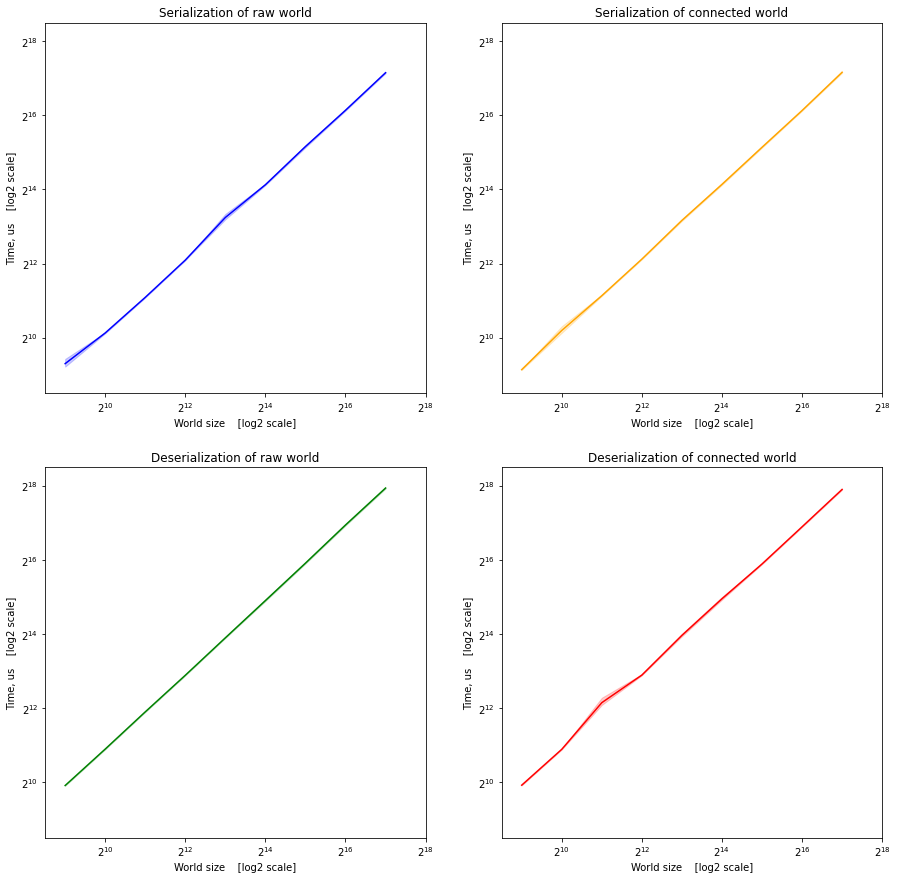

In [30]:
sr_data = data[data["Test type"] == "SR"][-9:]
sc_data = data[data["Test type"] == "SC"][-9:]
dr_data = data[data["Test type"] == "DR"][-9:]
dc_data = data[data["Test type"] == "DC"][-9:]
x = data[data["Test type"] == "SR"]["World size"][-9:]

_, ax = plt.subplots(2,2, figsize=(15,15))
ax[0][0].loglog(x,sr_data["Mean time"], color='blue', label='serialization of raw world', base=2)
ax[0][1].loglog(x,sc_data["Mean time"], color='orange', label='serialization of connected world', base=2)
ax[1][0].loglog(x,dr_data["Mean time"], color='green', label='deserialization of raw world', base=2)
ax[1][1].loglog(x,dc_data["Mean time"], color='red', label='deserialization of connected world', base=2)

ax[0][0].fill_between(x, sr_data["Mean min"], sr_data["Mean max"], color='blue', alpha=.2)
ax[0][1].fill_between(x, sc_data["Mean min"], sc_data["Mean max"], color='orange', alpha=.2)
ax[1][0].fill_between(x, dr_data["Mean min"], dr_data["Mean max"], color='green', alpha=.2)
ax[1][1].fill_between(x, dc_data["Mean min"], dc_data["Mean max"], color='red', alpha=.2)

ax[0][0].title.set_text('Serialization of raw world')
ax[0][1].title.set_text('Serialization of connected world')
ax[1][0].title.set_text('Deserialization of raw world')
ax[1][1].title.set_text('Deserialization of connected world')

for axx in ax:
    for a in axx:
        a.set_xlabel("World size    [log2 scale]")
        a.set_ylabel("Time, us    [log2 scale]")
        a.set_xlim(left=2**8.5, right=2**18)
        a.set_ylim(bottom=2**8.5, top=2**18.5)

plt.savefig("time_separ_big_loglog.png")